Importing Libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

Loading the Dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train.shape

170508288/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape
#one D array is not needed

(50000, 1)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

Dataset Exploration

In [ ]:
def plot(x, y, index):
  plt.figure(figsize = (15,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

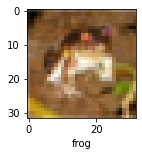

In [ ]:
plot(x_train, y_train, 0)

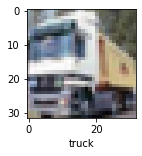

In [ ]:
plot(x_train, y_train, 1)

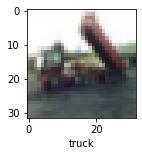

In [ ]:
plot(x_train, y_train, 2)

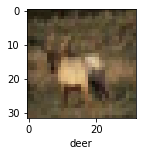

In [ ]:
plot(x_train, y_train, 3)

Normalizing Pixel Values

In [ ]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [ ]:
x_train[0]/ 255

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [ ]:
x_train = x_train/ 255
x_test = x_test/ 255

Building the Artificial Neural Network

In [ ]:
ann = models.Sequential([
                         layers.Flatten(input_shape = (32, 32, 3)),
                         layers.Dense(3000, activation = 'relu'),
                         layers.Dense(2000, activation = 'relu'),
                         layers.Dense(1000, activation = 'relu'),
                         layers.Dense(10, activation = 'sigmoid')
                         ])
ann.compile(optimizer = 'SGD',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])
ann.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 168s 107ms/step - loss: 1.8092 - accuracy: 0.3520
Epoch 2/10
1563/1563 [==============================] - 166s 106ms/step - loss: 1.6149 - accuracy: 0.4260
Epoch 3/10
1563/1563 [==============================] - 168s 108ms/step - loss: 1.5252 - accuracy: 0.4605
Epoch 4/10
1563/1563 [==============================] - 166s 106ms/step - loss: 1.4635 - accuracy: 0.4821
Epoch 5/10
1563/1563 [==============================] - 165s 105ms/step - loss: 1.4096 - accuracy: 0.5002
Epoch 6/10
1563/1563 [==============================] - 168s 107ms/step - loss: 1.3648 - accuracy: 0.5168
Epoch 7/10
1563/1563 [==============================] - 167s 107ms/step - loss: 1.3194 - accuracy: 0.5345
Epoch 8/10
1563/1563 [==============================] - 165s 106ms/step - loss: 1.2807 - accuracy: 0.5468
Epoch 9/10
1563/1563 [==============================] - 167s 107ms/step - loss: 1.2442 - accuracy: 0.5622
Epoch 10/10
1563/1563 [=======================

In [ ]:
ann.evaluate(x_test, y_test)

313/313 [==============================] - 11s 34ms/step - loss: 1.4078 - accuracy: 0.4975


[1.407794713973999, 0.4975000023841858]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(x_test) 
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report :\n", classification_report(y_test, y_pred_classes))

Classification Report :
               precision    recall  f1-score   support

           0       0.63      0.53      0.57      1000
           1       0.82      0.34      0.48      1000
           2       0.48      0.34      0.40      1000
           3       0.39      0.33      0.36      1000
           4       0.44      0.46      0.45      1000
           5       0.52      0.30      0.38      1000
           6       0.63      0.50      0.56      1000
           7       0.38      0.79      0.52      1000
           8       0.50      0.77      0.61      1000
           9       0.53      0.61      0.57      1000

    accuracy                           0.50     10000
   macro avg       0.53      0.50      0.49     10000
weighted avg       0.53      0.50      0.49     10000



Building the Convoluted Neural Network

In [ ]:
cnn = models.Sequential([
                         layers.Conv2D(filters = 32, kernel_size = (3,3),  activation = 'relu', input_shape = (32,32,3)),
                         layers.MaxPooling2D(2,2),

                         layers.Conv2D(filters = 64, kernel_size = (3,3),  activation = 'relu'),
                         layers.MaxPooling2D(2,2),

                         layers.Flatten(),
                         layers.Dense(64, activation = 'relu'),
                         layers.Dense(10, activation = 'softmax')
                         ])

cnn.compile(optimizer = 'Adam',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

cnn.fit(x_train, y_train, epochs = 29)

Epoch 1/29
1563/1563 [==============================] - 63s 40ms/step - loss: 1.4998 - accuracy: 0.4596
Epoch 2/29
1563/1563 [==============================] - 61s 39ms/step - loss: 1.1240 - accuracy: 0.6062
Epoch 3/29
1563/1563 [==============================] - 61s 39ms/step - loss: 0.9860 - accuracy: 0.6567
Epoch 4/29
1563/1563 [==============================] - 61s 39ms/step - loss: 0.8974 - accuracy: 0.6887
Epoch 5/29
1563/1563 [==============================] - 61s 39ms/step - loss: 0.8289 - accuracy: 0.7127
Epoch 6/29
1563/1563 [==============================] - 61s 39ms/step - loss: 0.7769 - accuracy: 0.7307
Epoch 7/29
1563/1563 [==============================] - 62s 40ms/step - loss: 0.7293 - accuracy: 0.7469
Epoch 8/29
1563/1563 [==============================] - 62s 39ms/step - loss: 0.6849 - accuracy: 0.7616
Epoch 9/29
1563/1563 [==============================] - 61s 39ms/step - loss: 0.6479 - accuracy: 0.7746
Epoch 10/29
1563/1563 [==============================] - 61s 39m

In [ ]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 4s 13ms/step - loss: 1.6280 - accuracy: 0.6786


[1.6279710531234741, 0.678600013256073]

In [ ]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

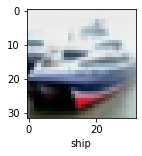

In [ ]:
plot(x_test, y_test, 1)

In [ ]:
y_pred = cnn.predict(x_test)
y_pred[:5]

array([[4.02531819e-04, 1.25990118e-09, 5.08590468e-08, 9.65552807e-01,
        2.66796385e-09, 2.55364217e-02, 1.99733805e-07, 1.55660651e-10,
        8.50806665e-03, 4.98790065e-10],
       [2.84813632e-06, 5.53876050e-02, 7.36155471e-07, 2.28711583e-09,
        3.45935766e-17, 4.74100923e-12, 2.02968797e-20, 3.02103394e-19,
        9.44608152e-01, 7.02983925e-07],
       [3.48742418e-02, 3.27038486e-03, 1.71423657e-04, 9.72008158e-04,
        6.78244905e-05, 2.16563649e-06, 1.46874550e-06, 2.83365935e-05,
        9.60584104e-01, 2.80950098e-05],
       [9.98162568e-01, 3.53300288e-06, 2.34391200e-06, 1.94489154e-08,
        1.00733502e-08, 1.39918903e-12, 1.43986418e-12, 2.07150408e-11,
        1.83145388e-03, 5.07771558e-09],
       [8.09705005e-13, 1.75485937e-08, 9.17534751e-04, 1.64562499e-03,
        8.60955834e-01, 1.22469923e-04, 1.36358559e-01, 1.26933915e-11,
        1.86723709e-11, 6.08783596e-12]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

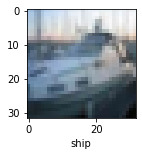

In [ ]:
plot(x_test, y_test, 2)

In [ ]:
classes[y_classes[2]]

'ship'

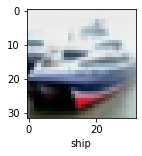

In [ ]:
plot(x_test, y_test, 1)

In [ ]:
classes[y_classes[1]]

'ship'

In [ ]:
print("Classification Report :\n", classification_report(y_test, y_classes))

Classification Report :
               precision    recall  f1-score   support

           0       0.77      0.65      0.71      1000
           1       0.83      0.80      0.81      1000
           2       0.60      0.50      0.55      1000
           3       0.46      0.59      0.52      1000
           4       0.63      0.61      0.62      1000
           5       0.59      0.54      0.56      1000
           6       0.76      0.74      0.75      1000
           7       0.73      0.73      0.73      1000
           8       0.72      0.84      0.78      1000
           9       0.75      0.79      0.77      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000

